# Classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

data from https://www.kaggle.com/c/yelp-recsys-2013/data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('yelp.csv')

In [5]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
df['text_length'] = df['text'].apply(len)

In [9]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


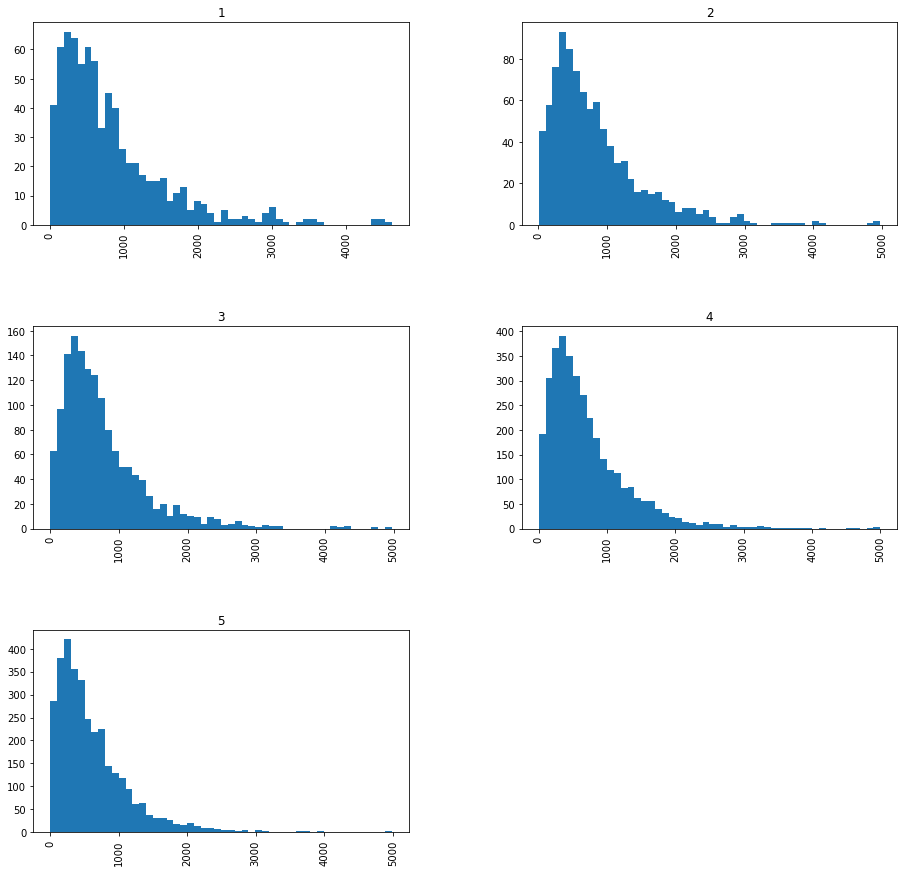

In [10]:
df.hist(column='text_length', by='stars', bins=50, figsize=(15, 15));

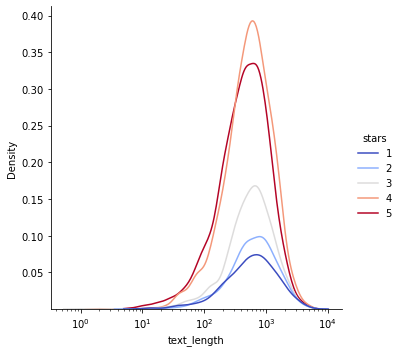

In [11]:
sns.displot(x='text_length', data=df, hue='stars', kind='kde', palette='coolwarm', log_scale=True);

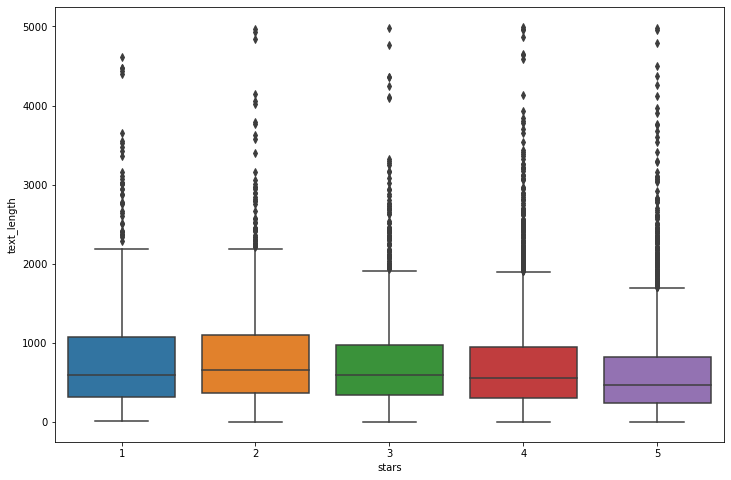

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='stars', y='text_length', data=df);

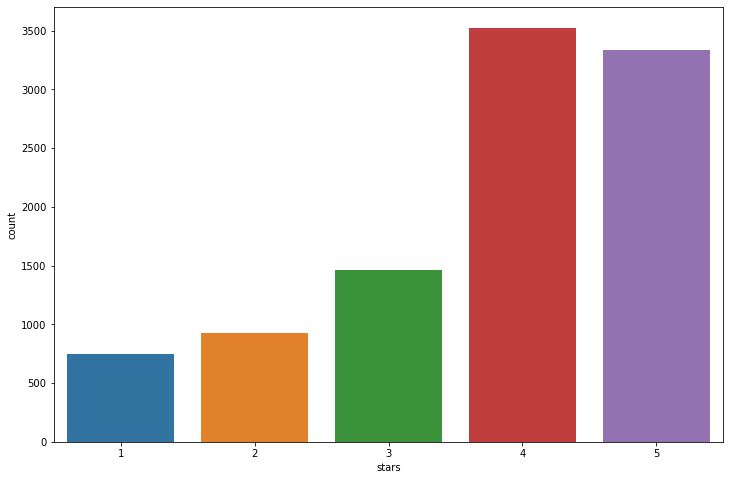

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(x='stars', data=df);

In [14]:
stars = df.groupby(by='stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


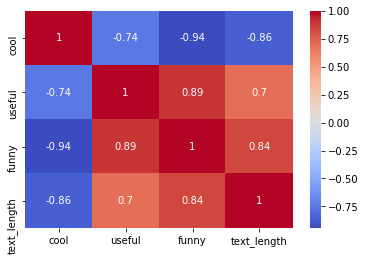

In [16]:
sns.heatmap(data=stars.corr(), cmap='coolwarm', annot=True);

# No punctuation and stopwords func:

In [17]:
import string
from nltk.corpus import stopwords

In [18]:
def clean_text(text):
    nopunct = [elem for elem in text if elem not in string.punctuation]
    nopunct = ''.join(nopunct)
    no_stopwords = [word for word in nopunct.split() if word.lower() not in stopwords.words('english')]
    return no_stopwords


In [19]:
df['text'][0:4].apply(clean_text)

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, Rice, good, also, dig, can...
3    [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
Name: text, dtype: object

In [20]:
df['text'].head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

# NLP Classification 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
df_yelp = df[(df['stars']==1) | (df['stars']==5)]

In [23]:
X = df_yelp['text']
y = df_yelp['stars']

In [24]:
cv = CountVectorizer()

In [25]:
X = cv.fit_transform(X)

## Train Test Split


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [29]:
nb.fit(X_train, y_train)

MultinomialNB()

# Predictions and Evaluations

In [30]:
predictions = nb.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Using Text Processing

In [33]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [34]:
from sklearn.pipeline import Pipeline

In [57]:
pipeline_multi = Pipeline([
    ('bow', CountVectorizer()),  
    ('classifier', MultinomialNB())  
])

In [59]:
pipeline_multi_text_corr = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)), 
    ('classifier', MultinomialNB())  
])

In [52]:
X = df_yelp['text']
y = df_yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [58]:
pipeline_multi.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [60]:
pipeline_multi_text_corr.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x7f144d0d2040>)),
                ('classifier', MultinomialNB())])

In [61]:
predictions_multi = pipeline_multi.predict(X_test)

In [63]:
predictions_multi_text_corr = pipeline_multi_text_corr.predict(X_test)

In [62]:
print(classification_report(y_test,predictions_multi))

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226



In [64]:
print(classification_report(y_test,predictions_multi_text_corr))

              precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



# Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [71]:
pipeline_log_regr = Pipeline([
    ('bow', CountVectorizer()),  
    ('classifier', LogisticRegression(max_iter=10000))  
])

In [72]:
pipeline_log_regr.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [73]:
predictions_log_regr = pipeline_log_regr.predict(X_test)

In [74]:
print(classification_report(y_test, predictions_log_regr))

              precision    recall  f1-score   support

           1       0.87      0.77      0.82       228
           5       0.95      0.97      0.96       998

    accuracy                           0.94      1226
   macro avg       0.91      0.87      0.89      1226
weighted avg       0.93      0.94      0.93      1226



# Random Forest: 

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
pipeline_rand_forest = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', RandomForestClassifier(n_estimators=200)) 
])

In [79]:
pipeline_rand_forest.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [83]:
predictions_rand_forest = pipeline_rand_forest.predict(X_test)

In [84]:
print(classification_report(y_test, predictions_rand_forest))

              precision    recall  f1-score   support

           1       0.89      0.22      0.36       228
           5       0.85      0.99      0.92       998

    accuracy                           0.85      1226
   macro avg       0.87      0.61      0.64      1226
weighted avg       0.86      0.85      0.81      1226



# Final Analysis:

In [85]:
print('Multinomial')
print('\n')
print(classification_report(y_test,predictions_multi_text_corr))
print('\n')
print('Log regr')
print('\n')
print(classification_report(y_test, predictions_log_regr))
print('\n')
print('Rand forest')
print('\n')
print(classification_report(y_test, predictions_rand_forest))


Multinomial


              precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



Log regr


              precision    recall  f1-score   support

           1       0.87      0.77      0.82       228
           5       0.95      0.97      0.96       998

    accuracy                           0.94      1226
   macro avg       0.91      0.87      0.89      1226
weighted avg       0.93      0.94      0.93      1226



Rand forest


              precision    recall  f1-score   support

           1       0.89      0.22      0.36       228
           5       0.85      0.99      0.92       998

    accuracy                           0.85      1226
   macro avg       0.87      0.61      0.64      1226
weighted avg       0.86      0.